## Прикладные методы математической статистики
### Домашнее задание 1. Вариант 4.
   **Студент:** Абу Аль Лабан Н. А.  
   **Группа:** БПИ 198
   
   ---
   ### **Цель:** 
Оценить среднюю продолжительность вскармливания.  
  
   **а)** Рассчитать 90% доверительный интервал для средней продолжительности, считая распределение признака нормальным.  
   **б)** Построить график «квантиль-квантиль» и попробуйте понять, соответствует ли распределение времени вскармливания нормальному закону.  
   **в)** Рассчитать данным методом 90% доверительный интервал для средней продолжительности вскармливания, сгенерировав 1000 перевыборок.  
   **г)** Построить гистограмму для полученных в предыдщем пункте средних значений. Похоже ли распределение среднего в перевыборках на нормальное?
    
   ---
 

Подключим все необходимые для работы библиотеки 

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import random

Выборка данных о продолжительости грудного вскрармливания в неделях состоит из 22 элементов

In [2]:
duration = [20, 6, 13, 35, 19, 14, 24, 23, 43, 27, 4,
            28, 16, 9, 24, 16, 4, 21, 18, 27, 21, 6]
n = len(duration)
print('Выборка: ')
display(pd.DataFrame([['X_{}'.format(i+1) for i in range(11)], duration[:11],
                      ['X_{}'.format(i+12) for i in range(11)], duration[11:]],
                    columns=['' for i in range(11)],
                    index=['' for i in range(4)]))


Выборка: 


,,,,,,,,,,,
,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11
,20,6,13,35,19,14,24,23,43,27,4
,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22
,28,16,9,24,16,4,21,18,27,21,6


---
#### a) Построение доверительного интервала
    
Чтобы построить доверительный интервал, необходимо:
- Задать уровень значимости $\alpha$ 
- Найти квантиль распределения Стьюдента $t_{(\frac{\alpha}{2}; n-1)}$ 
- Найти среднее выборочное значение $\overline X$
- Найти стандартное отклонение $\hat\sigma$
- Найти границы интервала, подставив в формулу полученные значения 

##### Приступим к вычислениям.  
1. **Уровень доверия**, заданный по условию: $\alpha - 1 = 0.9$  
Отсюда находим **уровень значимости:** $\alpha = 0.1$  
2. Найдем **квантиль распределения Стьюдента** по соответствующей таблице: $t_{(0.05; 21)} = 1.721$  
3. Рассчитаем **среднее выборочное значение** по формуле: $\overline X = \frac{\sum^n_{i = 1}X_i}{n}$
4. Стандартное отклонение найдем с помощью скорректированной выборочной дисперсии: $\hat\sigma = \sqrt{\hat\sigma^2}$  
Для этого вычислим **скорректированную выборочную дисперсию**  по формуле: $\hat \sigma^2 = \frac{\sum^n_{i = 1}(X_i - \overline X)^2}{n - 1}$  
5. Имея результаты вычислений, **интервал** найдем из формулы:  
 $\overline X - \big(t_{(\frac{\alpha}{2}; n-1)} \cdot \frac {\hat \sigma } {\sqrt n}\big) \leqslant \mu \leqslant \overline X + \big(t_{(\frac{\alpha}{2}; n-1)} \cdot \frac {\hat \sigma } {\sqrt n}\big)$ 

In [3]:
x = sum(duration) / n # Среднее выборочное
s = sum([(d - x)**2 
         for d in duration]) / (n - 1) # Выборочная дисперсия
t = 1.721 # Квантиль 

left = x - t * np.sqrt(s) / np.sqrt(n)  # Левая граница
right = x + t * np.sqrt(s) / np.sqrt(n) # Правая граница

In [4]:
print('Среднее выборочное: {:.2f}'.format(x))
print('Несмещенная выборочная дисперсия: {:.2f}'.format(s))
print('Левая граница: {}'.format(left))
print('Правая граница: {}'.format(right))

Среднее выборочное: 19.00
Несмещенная выборочная дисперсия: 99.24
Левая граница: 15.344820242959717
Правая граница: 22.655179757040283


Таким образом, **интервал**: $\big(15.34; 22.66\big)$

---
**б) Построение графика квантиль-квантиль**  
  
Рассчитаем **выборочные квантили** порядков $\frac{1}{n+1},..,\frac{n}{n+1}$  
Это упорядоченная по возрастанию выборка: $\hat Q \big(\frac{1}{n+1}\big) = X_{(1)},.., \hat Q \big(\frac{n}{n+1}\big) = X_{(n)}$  
  
Рассчитаем **теоретические квантили** - квантили нормального распределения с параметрами $\mu = \overline X$ и $\sigma^2 = \hat \sigma ^2$  
$Q \big(\frac{1}{n+1}\big) = \overline X + \hat \sigma \Phi^{-1}\big(\frac{1}{n+1}\big) ,.., Q \big(\frac{n}{n+1}\big) = \overline X + \hat \sigma \Phi^{-1}\big(\frac{n}{n+1}\big)$  
  
Построим график на осях $(Q, \hat Q)$

In [5]:
duration.sort()
Q = duration # Выборочные квантили
phi = [scipy.stats.norm.ppf((i+1)/(n+1)) for i in range(n)] # Квантили нормального распределения Ф^-1
tQ = [x + np.sqrt(s) * p for p in phi] # Теоретические квантили

In [6]:
print('Выборочные квантили: ')
display(pd.DataFrame([['X({})'.format(i+1) for i in range(11)], Q[:11],
                      ['X({})'.format(i+12) for i in range(11)], Q[11:]],
                    columns=['' for i in range(11)],
                    index=['' for i in range(4)]))
print()
print('Теоретичесикие квантили: ')
display(pd.DataFrame([['Q({}/23)'.format(i+1) for i in range(11)], tQ[:11],
                      ['Q({}/23)'.format(i+12) for i in range(11)], tQ[11:]],
                     columns=['' for i in range(11)],
                     index=['' for i in range(4)]))

Выборочные квантили: 


,,,,,,,,,,,
,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),X(11)
,4,4,6,6,9,13,14,16,16,18,19
,X(12),X(13),X(14),X(15),X(16),X(17),X(18),X(19),X(20),X(21),X(22)
,20,21,21,23,24,24,27,27,28,35,43



Теоретичесикие квантили: 


,,,,,,,,,,,
,Q(1/23),Q(2/23),Q(3/23),Q(4/23),Q(5/23),Q(6/23),Q(7/23),Q(8/23),Q(9/23),Q(10/23),Q(11/23)
,1.948578,5.454525,7.799532,9.647690,11.219472,12.617784,13.900177,15.102969,16.251321,17.364160,18.456892
,Q(12/23),Q(13/23),Q(14/23),Q(15/23),Q(16/23),Q(17/23),Q(18/23),Q(19/23),Q(20/23),Q(21/23),Q(22/23)
,19.543108,20.635840,21.748679,22.897031,24.099823,25.382216,26.780528,28.352310,30.200468,32.545475,36.051422


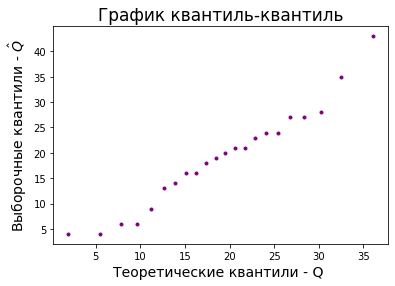

In [7]:
plt.plot()
plt.title('График квантиль-квантиль', fontsize=17, color='black') 
plt.xlabel('Теоретические квантили - Q ',fontsize=14, color='black') 
plt.ylabel(r'Выборочные квантили - $\hat{Q}$',fontsize=14,color='black')
x = sp.Symbol('x')
plt.plot(tQ, Q,'.',linewidth = 5,color='purple')

Поскольку точки практически выстроены в линию, можно сделать вывод, что длительность вскармливания **распределена по нормальному закону**

---
#### **в) Построение доверительного интервала с помощью бутстрапа и генерации 1000 перевыборок**
  
  
Для начала неодбходимо построить 1000 **перевыборок** -  n случайно выбранных из основной выборки элементов (элеметы могут повторяться)

Для кажлой перевыборки необходимо найти среднее выборочное значение $\overline X_i$, это будут перевыборочные 

Далее нужно:
- Задать уровень значимости $\alpha$ 
- Отсортировать массив средних значений
- Найти границы интервала, взяв нужные квантили из средних значений


##### Приступим к рассчетам
1. Рассчитаем для каждой перевыборки **переыборочное среднее** по формуле: $\overline X_i = \frac{\sum^n_{i = 1}x_i}{n}$  
2. **Уровень доверия** по условию: $\alpha - 1 = 0.9$  
Отсюда находим **уровень значимости:** $\alpha = 0.1$  
3. Отсортируем по возрастанию найденные в п. 1 средние выборочные   
4. В общем случае, выборочные квантили $Q\big(\frac\alpha2\big)$ и  $Q\big(10 - \frac\alpha2\big)$ для средних в перевыборках образуют бутстраповский доверительный интервал для среднего в генеральной совокупности с уровнем доверия 1−α 
5. Наконец, найдем **интервал**, взяв $0.05*1000$ и $0.95*1000$ элменты, это и будут нужные квантили

In [8]:
duration = [20, 6, 13, 35, 19, 14, 24, 23, 43, 27, 4,
            28, 16, 9, 24, 16, 4, 21, 18, 27, 21, 6] # Сбрасываем отсортированность

bootstrap_lst = [[random.choice(duration) for i in range(n)] 
                 for j in range(1000)] # Генерируем перевыборки

# Средние перевыборочные для каждлй перевыборки
mean_lst = [sum(bootstrap) / n 
            for bootstrap in bootstrap_lst]
mean_lst.sort()

left = mean_lst[49] # Левая граница
right = mean_lst[949] # Правая граница

In [9]:
print('Левая граница: {}'.format(left))
print('Правая граница: {}'.format(right))

Левая граница: 15.772727272727273
Правая граница: 22.40909090909091


Таким образом, **интервал**: $\big(15.77; 22.41\big)$  
Интервал, найденный по исходной выборке: $\big(15.34; 22.66\big)$  
  
Поскольку интервалы находятся в одном отрезке, но найденный с помощью бутстрапа меньше, делаем вывод, что найденный в ходе эксперимента интревал **более точен**  
  
---
#### **г) Построение гистограммы**  
Гистограмма будет построена на основе средних значений перевыборок из предыдущего пункта

<function matplotlib.pyplot.show(close=None, block=None)>

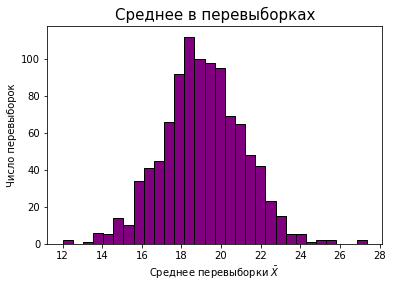

In [10]:
ax = plt.gca()
plt.title("Среднее в перевыборках",
          fontsize = 15,
          color = 'black') 
plt.xlabel(r'Среднее перевыборки $\bar{X}$',
           color = 'black') 
plt.ylabel('Число перевыборок', 
           color = 'black')
n, bin, patches = plt.hist(mean_lst, 
                           bins = 30,
                           color = 'purple', 
                           edgecolor = 'black', 
                           linewidth = 1) 
plt.show

Поскольку гистограмма напоминает колокол, делаем вывод, что распределение средних значений **похоже на нормальное**

---
**P.S.** В целях повышения читабельности удалены фрагменты кода, предназначенные для вывода данных